In [44]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


xem data

In [45]:
df=pd.read_csv("FPT.csv")
df = df[['Price']]
df

,Price
0,16158.2
1,16302.3
2,16248.3
3,16194.3
4,16284.3
...,...
1605,84900.0
1606,84400.0
1607,84200.0
1608,84100.0


# Chia train test tỉ lệ 8 2

In [46]:
# 2. Đọc file dữ liệu chứng khoán BIDV và chia train test validate theo tỉ lệ 8:2

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Chia train, test
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [47]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
# 3. xây dựng model ARIMA
import pmdarima as pm
auto_arima = pm.auto_arima(train_data, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [49]:
forecast_test_auto = auto_arima.predict(n_periods=len(test_data))
forecast_test_auto

1288    76986.226729
1289    77033.453458
1290    77080.680186
1291    77127.906915
1292    77175.133644
            ...     
1605    91957.099767
1606    92004.326496
1607    92051.553225
1608    92098.779953
1609    92146.006682
Length: 322, dtype: float64

In [50]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = auto_arima.predict(n_periods=len(y_test))

In [51]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = auto_arima.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
1288    76986.226729
1289    77033.453458
1290    77080.680186
1291    77127.906915
1292    77175.133644
1293    77222.360373
1294    77269.587102
1295    77316.813831
1296    77364.040559
1297    77411.267288
1298    77458.494017
1299    77505.720746
1300    77552.947475
1301    77600.174204
1302    77647.400932
1303    77694.627661
1304    77741.854390
1305    77789.081119
1306    77836.307848
1307    77883.534577
1308    77930.761305
1309    77977.988034
1310    78025.214763
1311    78072.441492
1312    78119.668221
1313    78166.894949
1314    78214.121678
1315    78261.348407
1316    78308.575136
1317    78355.801865
dtype: float64


In [52]:
# 7. Đánh giá độ chính xác test
# Chuyển đổi danh sách thành NumPy array để sử dụng tính toán nhanh hơn
y_true = np.array(test_data)
y_pred = np.array(forecast_test_auto)

# Tính toán sai số tuyệt đối và chuẩn hóa thành phần trăm
errors = np.abs((y_true - y_pred) / y_true) * 100

# Tính giá trị MAPE
mape = np.mean(errors)

print('Testing MAPE:', mape)

from sklearn.metrics import mean_squared_error
from math import sqrt
test_rmse = sqrt(mean_squared_error(test_data, y_pred))
print('Testing RMSE:', test_rmse)

Testing MAPE: 7.697936348914458
Testing RMSE: 8622.464869279107


Testing MAPE: 7.697936348914458
Testing RMSE: 8622.464869279107


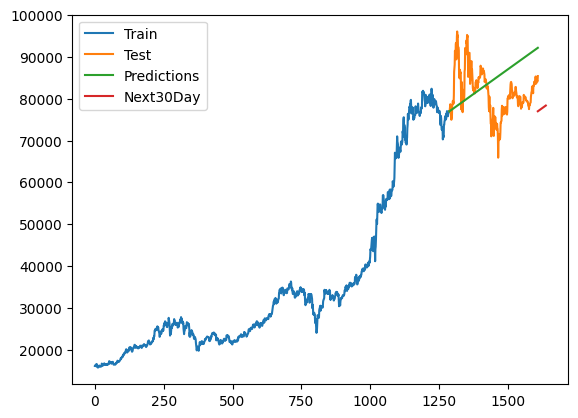

In [53]:
# 9.Vẽ hình
print('Testing MAPE:', mape)
print('Testing RMSE:', test_rmse)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [54]:
test_data.index

RangeIndex(start=1288, stop=1610, step=1)

# Chia train test theo tỉ lệ 7 3 (CHỌN)




In [55]:
# 2. Đọc file dữ liệu chứng khoán BIDV và chia train test validate theo tỉ lệ 7:3

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [56]:
#xây dựng model ARIMA
import pmdarima as pm
auto_arima = pm.auto_arima(train_data, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(1, 2, 3), scoring_args={}, suppress_warnings=True)

In [57]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = auto_arima.predict(n_periods=len(y_test))

In [58]:
forecast_test_auto = auto_arima.predict(n_periods=len(test_data))
forecast_test_auto

1127     73353.907094
1128     73611.044579
1129     73867.525171
1130     74123.452773
1131     74378.918335
            ...      
1605    213251.019697
1606    213585.863284
1607    213920.883422
1608    214256.080111
1609    214591.453351
Length: 483, dtype: float64

In [59]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = auto_arima.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
1127    73353.907094
1128    73611.044579
1129    73867.525171
1130    74123.452773
1131    74378.918335
1132    74634.001470
1133    74888.771863
1134    75143.290514
1135    75397.610818
1136    75651.779511
1137    75905.837505
1138    76159.820611
1139    76413.760175
1140    76667.683635
1141    76921.615011
1142    77175.575324
1143    77429.582978
1144    77683.654080
1145    77937.802732
1146    78192.041276
1147    78446.380514
1148    78700.829905
1149    78955.397725
1150    79210.091221
1151    79464.916735
1152    79719.879819
1153    79974.985333
1154    80230.237530
1155    80485.640134
1156    80741.196405
dtype: float64


In [60]:
# 7. Đánh giá độ chính xác test
# Chuyển đổi danh sách thành NumPy array để sử dụng tính toán nhanh hơn
y_true = np.array(test_data)
y_pred = np.array(forecast_test_auto)

# Tính toán sai số tuyệt đối và chuẩn hóa thành phần trăm
errors = np.abs((y_true - y_pred) / y_true) * 100

# Tính giá trị MAPE
mape = np.mean(errors)

print('Testing MAPE:', mape)

from sklearn.metrics import mean_squared_error
from math import sqrt
test_rmse = sqrt(mean_squared_error(test_data, y_pred))
print('Testing RMSE:', test_rmse)

Testing MAPE: 77.06030106410832
Testing RMSE: 72801.71488014028


Testing MAPE: 77.06030106410832
Testing RMSE: 72801.71488014028


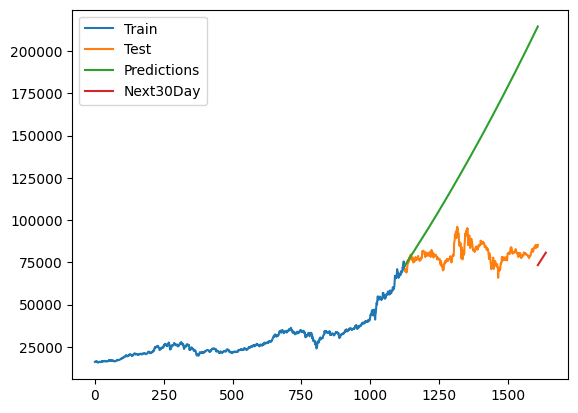

In [61]:
# 9.Vẽ hình
print('Testing MAPE:', mape)
print('Testing RMSE:', test_rmse)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# Chia train test theo tỉ lệ 9 1

In [62]:
# 2. Đọc file dữ liệu chứng khoán BIDV và chia train test validate theo tỉ lệ 9:1

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [63]:
#xây dựng model ARIMA
import pmdarima as pm
auto_arima = pm.auto_arima(train_data, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True)

In [64]:
forecast_test_auto = auto_arima.predict(n_periods=len(test_data))
forecast_test_auto

1449    73765.949052
1450    73981.000148
1451    74110.246346
1452    73958.198063
1453    74226.416579
            ...     
1605    80315.901533
1606    80356.009886
1607    80396.118239
1608    80436.226592
1609    80476.334945
Length: 161, dtype: float64

In [65]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = auto_arima.predict(n_periods=len(y_test))

In [66]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = auto_arima.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
1449    73765.949052
1450    73981.000148
1451    74110.246346
1452    73958.198063
1453    74226.416579
1454    74292.674502
1455    74310.981393
1456    74336.538320
1457    74391.962400
1458    74420.000121
1459    74457.381845
1460    74499.180985
1461    74540.821569
1462    74579.799137
1463    74620.462449
1464    74660.809805
1465    74700.818006
1466    74740.789773
1467    74780.975008
1468    74821.064548
1469    74861.154353
1470    74901.266862
1471    74941.386233
1472    74981.489828
1473    75021.598209
1474    75061.707854
1475    75101.816187
1476    75141.923717
1477    75182.032330
1478    75222.140758
dtype: float64


In [67]:
# 7. Đánh giá độ chính xác test
# Chuyển đổi danh sách thành NumPy array để sử dụng tính toán nhanh hơn
y_true = np.array(test_data)
y_pred = np.array(forecast_test_auto)

# Tính toán sai số tuyệt đối và chuẩn hóa thành phần trăm
errors = np.abs((y_true - y_pred) / y_true) * 100

# Tính giá trị MAPE
mape = np.mean(errors)

print('Testing MAPE:', mape)

from sklearn.metrics import mean_squared_error
from math import sqrt
test_rmse = sqrt(mean_squared_error(test_data, y_pred))
print('Testing RMSE:', test_rmse)

Testing MAPE: 4.651821031516701
Testing RMSE: 3101.6899628688257


Testing MAPE: 4.651821031516701
Testing RMSE: 3101.6899628688257


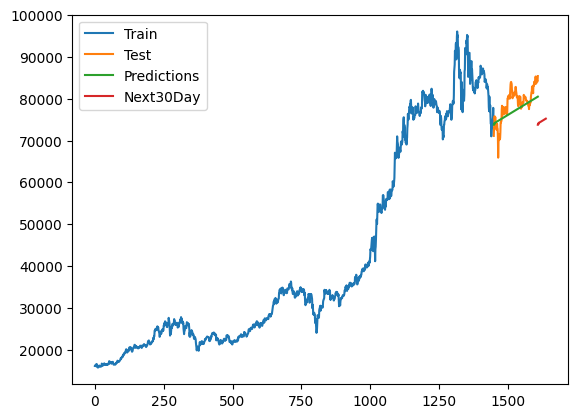

In [68]:
# 9.Vẽ hình
print('Testing MAPE:', mape)
print('Testing RMSE:', test_rmse)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()